In [1]:
import librosa
import numpy as np
import pandas as pd
import parselmouth
from parselmouth.praat import call
from scipy.signal import find_peaks, lfilter, hamming
from scipy.io import wavfile
from scipy.fftpack import fft
import features
import matplotlib.pyplot as plt

In [2]:
# Load an audio file
audio_path = '/Users/imdohyeon/Documents/PythonWorkspace/Lieon-ai/Dataset/data1.wav'  # Replace with your audio file path
y, sr = librosa.load(audio_path, sr=44100)  # 다운샘플링 하지 않음

In [15]:
# Feature Extraction
pitch = features.extract_f0(y, sr)
# print(f'Pitch (f0): {pitch}')
pitch

array([  0.        ,   0.        ,   0.        , ..., 165.76853496,
       169.64319079, 168.66611791])

In [3]:
# formants = features.extract_formants(audio_path)
formants = features.extract_formants_for_frames(audio_path)
formants

array([[ 170.1944975 , 1249.17721173, 2394.66171342, 3513.67637239,
        4480.28544154],
       [ 170.81604086, 1268.15916168, 2382.08850603, 3520.57802405,
        4508.06659846],
       [   0.        ,  169.4341951 , 1236.19562753, 2345.21317406,
        3537.71224015],
       ...,
       [ 488.42598919, 1124.62589183, 1847.49261388, 2381.47915965,
        2797.14493071],
       [ 401.29100373,  940.27147503, 1535.58747766, 2032.23762869,
        2974.38529665],
       [ 483.67086221,  900.02124209, 1451.1726781 , 2207.06113635,
        3176.50424725]])

In [4]:
spectral_flux = features.extract_spectral_flux(y, sr)
# print(f'Spectral Flux: {spectral_flux}')
spectral_flux

array([ 0.37532708,  0.9069108 ,  1.1767945 , ...,  8.832428  ,
        7.830514  , 11.800236  ], dtype=float32)

- 왜 Spectral flux의 row 길이와 Spectral entropy의 row,pitch 길이가 1 차이나는지 알아야 함
- 21142가 나와야 하는데 spectral flux는 21141

In [5]:
spectral_entropy = features.extract_spectral_entropy(y, sr)
# print(f'Spectral Entropy: {spectral_entropy}')
spectral_entropy

array([4.1649094, 2.34556  , 2.9380648, ..., 3.9132586, 3.9200428,
       3.606673 ], dtype=float32)

In [6]:
speech_rate, pause_durations = features.extract_prosody(y, sr)
# print(f'Prosody (Speech Rate, Pause Durations): {speech_rate}, {pause_durations}')
speech_rate

6.594480243071865

In [7]:
pause_durations
len(pause_durations)

651

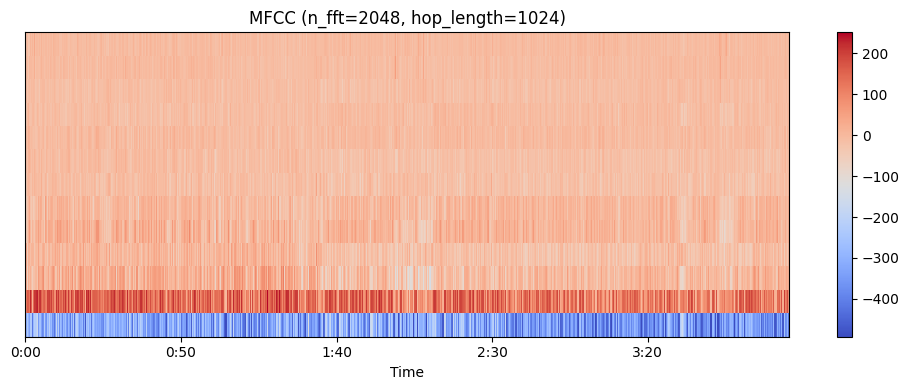

In [3]:
# MFCC test
# Normalize audio
y = librosa.util.normalize(y)

# 거짓말 탐지는 음성 내에서 미묘한 차이를 분석해야 하기 때문에, fft window와 최대 주파수를 높게 설정함
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, n_fft=2048, hop_length=1024, fmin=0, fmax=22050)

# Display MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC (n_fft=2048, hop_length=1024)')
plt.tight_layout()

plt.show()

In [8]:
mfcc = features.extract_mfcc(y, sr)
mfcc

,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10,MFCC_11,MFCC_12,MFCC_13
0,-481.155945,4.374830,4.265171,4.084953,3.837945,3.529261,3.165272,2.753409,2.301994,1.820031,1.316973,0.802510,0.286325
1,-464.808411,24.549911,21.125366,19.520258,17.498959,15.940676,11.448486,5.504924,2.724748,1.306166,0.550531,-2.042105,-6.395424
2,-417.123688,64.133575,31.907717,15.009972,7.300708,6.135604,4.142141,-2.732177,-7.416755,-1.658481,-4.034574,-14.473086,-16.621895
3,-318.594452,101.890091,49.240158,3.097432,-27.969490,5.627596,-4.223868,-4.170558,4.340842,8.728386,-0.076272,-9.997766,-25.176937
4,-167.600235,83.962608,-9.384384,-19.135725,-60.770195,-4.476185,-6.701210,8.534639,-14.439806,-8.652042,0.456661,-13.709048,-14.349099
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10567,-373.665588,83.786057,6.455432,22.291073,17.876339,-24.682873,-32.914581,-14.629028,-8.880215,-16.249529,-16.023773,-8.717771,-0.390960
10568,-405.721252,67.162994,11.122684,9.997427,10.964226,-10.647249,-19.689167,-16.734627,-16.573669,-10.905899,-2.455184,-1.676266,-0.675645
10569,-354.559113,81.150406,-21.236065,3.621191,1.345885,-21.010696,-8.707665,-10.928897,-10.470692,-0.650420,-6.800658,-7.917268,-5.973161
10570,-258.392029,139.702789,-47.297211,-5.496667,6.458054,-27.155254,-11.664697,-10.659401,-10.265768,-3.588509,-12.634677,-5.334352,0.975055
